In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


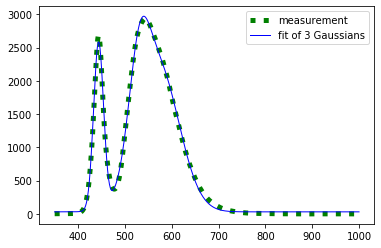

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

data = np.genfromtxt('8Mar_LED_Emission2_Smooth.txt')

def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

def parameters(h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return h1, c1, w1, h2, c2, w2, h3, c3, w3, offset


errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2

guess3 = [0, 2500, 444, 11, 1500, 550, 15, 1125, 600, 15]  

optim3, success = optimize.leastsq(errfunc3, guess3[:], args=(data[:,0], data[:,1]))
optim3

plt.plot(data[:,0], data[:,1], lw=5, c='g', linestyle = 'dotted',label='measurement')
plt.plot(data[:,0], three_gaussians(data[:,0], *optim3),
    lw=1, c='b', linestyle='-', label='fit of 3 Gaussians')
plt.legend(loc='best');

h1, c1, w1, h2, c2, w2, h3, c3, w3, off = parameters(*optim3)

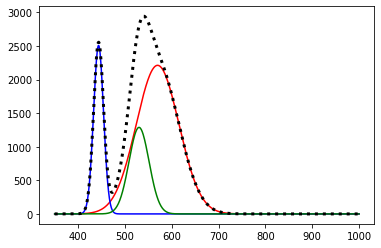

In [27]:
y1 = gaussian(data[:,0], h1, c1, w1, offset=0)
y2 = gaussian(data[:,0], h2, c2, w2, offset=0)
y3 = gaussian(data[:,0], h3, c3, w3, offset=0)

yfin = y1 + y2 + y3
plot(data[:,0],y1, color='red')
plot(data[:,0],y2, color='blue')
plot(data[:,0],y3, color='green')
plot(data[:,0],yfin, lw=3, linestyle='dotted', color='black');
#ax1.set_xlabel("Wavelength",family="serif",  fontsize=12)
#ax1.set_ylabel("Intensity (a.u.)",family="serif",  fontsize=12)

In [19]:
# this cell prints the fitting parameters with their errors
h1, c1, w1, h2, c2, w2, h3, c3, w3, off = parameters(*optim3)
print ("-------------Peak 1-------------")
print ("amplitude = %0.2f (+/-) %0.2f",(h1), "a.u.")
print ("center = %0.2f (+/-) %0.2f",(c1), "nm")
print ("sigma = %0.2f (+/-) %0.2f", (w1),"nm")
print ("area = %0.2f",np.trapz(y1))
print ("--------------------------------")
print ("-------------Peak 2-------------")
print ("amplitude = %0.2f (+/-) %0.2f",(h2), "a.u.")
print ("center = %0.2f (+/-) %0.2f",(c2),"nm")
print ("sigma = %0.2f (+/-) %0.2f",(w2),"nm")
print ("area = %0.2f",np.trapz(y2))
print ("--------------------------------")
print ("-------------Peak 3-------------")
print ("amplitude = %0.2f (+/-) %0.2f",(h3), "a.u.")
print ("center = %0.2f (+/-) %0.2f",(c3),"nm")
print ("sigma = %0.2f (+/-) %0.2f",(w3),"nm")
print ("area = %0.2f",np.trapz(y3))
print ("--------------------------------")

-------------Peak 1-------------
amplitude = %0.2f (+/-) %0.2f 2212.7967139926227 a.u.
center = %0.2f (+/-) %0.2f 569.7861733579499 nm
sigma = %0.2f (+/-) %0.2f 45.387781541710225 nm
area = %0.2f 251750.37669767454
--------------------------------
-------------Peak 2-------------
amplitude = %0.2f (+/-) %0.2f 2509.7383100555667 a.u.
center = %0.2f (+/-) %0.2f 443.72752723376937 nm
sigma = %0.2f (+/-) %0.2f 10.614334163684974 nm
area = %0.2f 66774.57465658014
--------------------------------
-------------Peak 3-------------
amplitude = %0.2f (+/-) %0.2f 1288.3394163843127 a.u.
center = %0.2f (+/-) %0.2f 530.17219487993 nm
sigma = %0.2f (+/-) %0.2f 21.40546957244652 nm
area = %0.2f 69126.56675208316
--------------------------------


In [25]:
#Next we need to compute the ratios for the R, G, B
#
print("R peak",(c1))
print("G peak",(c3))
print("B peak",(c2))
area1=c1*w1 #np.trapz(y1c1*w1 #)
area2=c3*w3 #np.trapz(y3)
area3=c2*w2 #np.trapz(y2)
list1=(c1,c2,c3)
print("ratio",area1,":",area3,":",area1,":")
ratio1=area1/area1
ratio2=area3/area1
ratio3=area1/area1
print("Normalize ratio",ratio1,":",ratio2,":",ratio3)

R peak 569.7861733579499
G peak 530.17219487993
B peak 443.72752723376937
ratio 25861.33036185766 : 4709.872251684853 : 25861.33036185766 :
Normalize ratio 1.0 : 0.18212026163322773 : 1.0


In [4]:
err3 = np.sqrt(errfunc3(optim3, data[:,0], data[:,1])).sum()

print('Residual error when fitting 3 Gaussians: ', err3 )

Residual error when fitting 3 Gaussians:  23046.409406484443
